In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Set to display all the columns in dataset
pd.set_option("display.max_columns", None)

# Import psql to run queries 
import pandasql as psql

In [3]:
heart = pd.read_csv(r"C:\Users\Sarvani\Desktop\Heart_Disease_Prediction.csv", header=0)
heart_bk=heart.copy()
heart_bk.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
heart.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
heart.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [7]:
#statistical measures about data
heart.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [9]:
heart['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [11]:
heart['Heart Disease']=heart['Heart Disease'].replace('Presence','1')
heart['Heart Disease']=heart['Heart Disease'].replace('Absence','0')
heart['Heart Disease']=heart['Heart Disease'].astype(int)

In [12]:
#count target or dependent variable by 0 & 1
heart_count=heart['Heart Disease'].value_counts()
print('Class 0:',heart_count[0])
print('Class 1:',heart_count[1])
print('Proportion:',round(heart_count[0]/heart_count[1],2),':1')
print('Total records:',len(heart))

Class 0: 150
Class 1: 120
Proportion: 1.25 :1
Total records: 270


In [13]:
heart

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


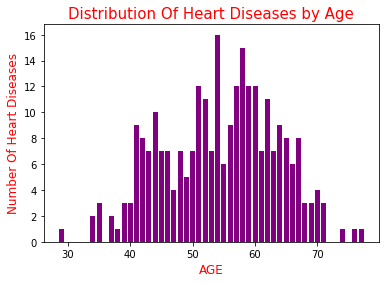

In [15]:
#data visualization using bar graph
heart['Age'].value_counts()
a=heart['Age'].value_counts().keys()
b=heart['Age'].value_counts().tolist()
plt.bar(a,b,color='purple')
plt.title('Distribution Of Heart Diseases by Age',color='red',size=15)
plt.xlabel('AGE',color='red',size=12)
plt.ylabel('Number Of Heart Diseases',color='red',size=12)
plt.show()

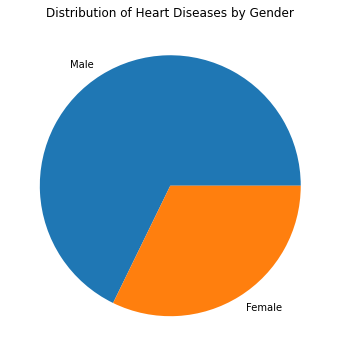

In [23]:
heart_counts = heart['Sex'].value_counts()
# Plotting a pie chart
plt.figure(figsize=(6,6))
plt.pie(heart_counts, labels=["Male","Female"])
plt.title('Distribution of Heart Diseases by Gender')
plt.show()

In [25]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in heart.columns:
    if col != 'Heart Disease':
        IndepVar.append(col)

TargetVar = 'Heart Disease'

x = heart[IndepVar]
y = heart[TargetVar]

In [26]:
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [27]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int32

In [28]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y, random_state = 42)
x.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape

((270, 13), (189, 13), (189,), (81, 13), (81,))

In [29]:
heart

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [33]:
cols1=['BP','Cholesterol','Max HR']

In [34]:
# Scaling the features by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [37]:
HTResults=pd.read_csv(r"C:\Users\Sarvani\Desktop\HTResults.csv")
HTResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[34  2]
 [ 8 37]]
Outcome values : 
 34 2 8 37
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.94      0.87        36
           0       0.95      0.82      0.88        45

    accuracy                           0.88        81
   macro avg       0.88      0.88      0.88        81
weighted avg       0.89      0.88      0.88        81

Accuracy : 87.7 %
Precision : 81.0 %
Recall : 94.4 %
F1 Score : 0.872
Specificity or True Negative Rate : 82.2 %
Balanced Accuracy : 88.3 %
roc_auc_score: 0.883


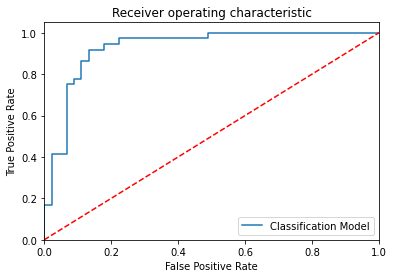

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[31  5]
 [16 29]]
Outcome values : 
 31 5 16 29
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.86      0.75        36
           0       0.85      0.64      0.73        45

    accuracy                           0.74        81
   macro avg       0.76      0.75      0.74        81
weighted avg       0.77      0.74      0.74        81

Accuracy : 74.1 %
Precision : 66.0 %
Recall : 86.1 %
F1 Score : 0.747
Specificity or True Negative Rate : 64.4 %
Balanced Accuracy : 75.2 %
roc_auc_score: 0.753


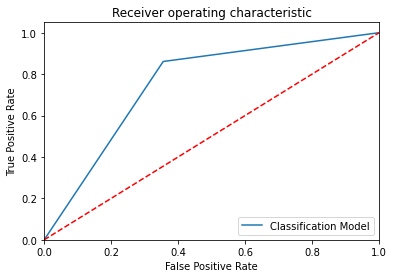

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[32  4]
 [ 7 38]]
Outcome values : 
 32 4 7 38
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.89      0.85        36
           0       0.90      0.84      0.87        45

    accuracy                           0.86        81
   macro avg       0.86      0.87      0.86        81
weighted avg       0.87      0.86      0.86        81

Accuracy : 86.4 %
Precision : 82.1 %
Recall : 88.9 %
F1 Score : 0.853
Specificity or True Negative Rate : 84.4 %
Balanced Accuracy : 86.6 %
roc_auc_score: 0.867


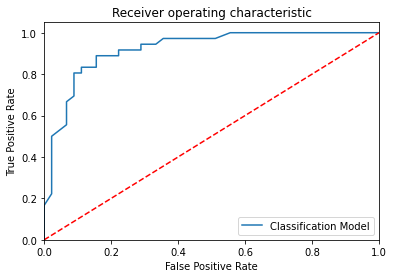

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[32  4]
 [ 5 40]]
Outcome values : 
 32 4 5 40
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.89      0.88        36
           0       0.91      0.89      0.90        45

    accuracy                           0.89        81
   macro avg       0.89      0.89      0.89        81
weighted avg       0.89      0.89      0.89        81

Accuracy : 88.9 %
Precision : 86.5 %
Recall : 88.9 %
F1 Score : 0.877
Specificity or True Negative Rate : 88.9 %
Balanced Accuracy : 88.9 %
roc_auc_score: 0.889


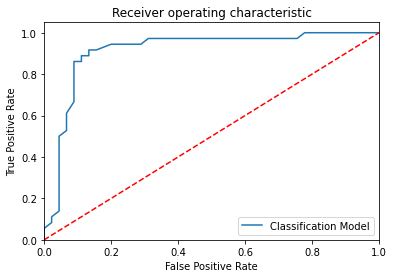

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[27  9]
 [ 7 38]]
Outcome values : 
 27 9 7 38
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.75      0.77        36
           0       0.81      0.84      0.83        45

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81

Accuracy : 80.2 %
Precision : 79.4 %
Recall : 75.0 %
F1 Score : 0.771
Specificity or True Negative Rate : 84.4 %
Balanced Accuracy : 79.7 %
roc_auc_score: 0.797


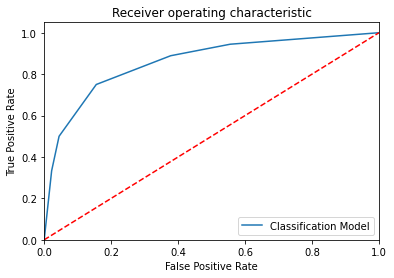

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[33  3]
 [ 8 37]]
Outcome values : 
 33 3 8 37
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.92      0.86        36
           0       0.93      0.82      0.87        45

    accuracy                           0.86        81
   macro avg       0.86      0.87      0.86        81
weighted avg       0.87      0.86      0.86        81

Accuracy : 86.4 %
Precision : 80.5 %
Recall : 91.7 %
F1 Score : 0.857
Specificity or True Negative Rate : 82.2 %
Balanced Accuracy : 86.9 %
roc_auc_score: 0.869


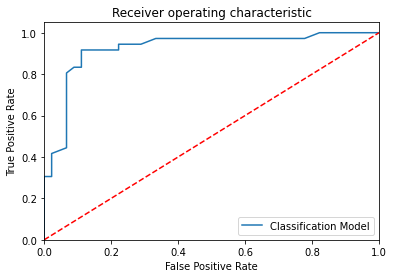

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[34  2]
 [ 9 36]]
Outcome values : 
 34 2 9 36
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.94      0.86        36
           0       0.95      0.80      0.87        45

    accuracy                           0.86        81
   macro avg       0.87      0.87      0.86        81
weighted avg       0.88      0.86      0.86        81

Accuracy : 86.4 %
Precision : 79.1 %
Recall : 94.4 %
F1 Score : 0.861
Specificity or True Negative Rate : 80.0 %
Balanced Accuracy : 87.2 %
roc_auc_score: 0.872


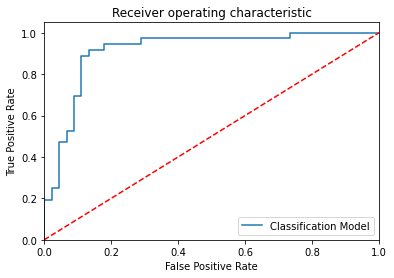

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[32  4]
 [ 7 38]]
Outcome values : 
 32 4 7 38
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.89      0.85        36
           0       0.90      0.84      0.87        45

    accuracy                           0.86        81
   macro avg       0.86      0.87      0.86        81
weighted avg       0.87      0.86      0.86        81

Accuracy : 86.4 %
Precision : 82.1 %
Recall : 88.9 %
F1 Score : 0.853
Specificity or True Negative Rate : 84.4 %
Balanced Accuracy : 86.6 %
roc_auc_score: 0.867


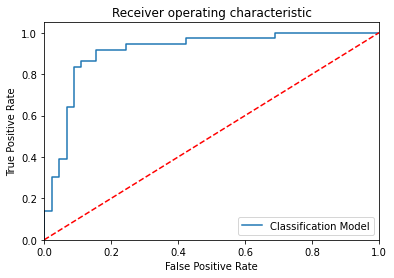

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[31  5]
 [ 8 37]]
Outcome values : 
 31 5 8 37
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.86      0.83        36
           0       0.88      0.82      0.85        45

    accuracy                           0.84        81
   macro avg       0.84      0.84      0.84        81
weighted avg       0.84      0.84      0.84        81

Accuracy : 84.0 %
Precision : 79.5 %
Recall : 86.1 %
F1 Score : 0.827
Specificity or True Negative Rate : 82.2 %
Balanced Accuracy : 84.1 %
roc_auc_score: 0.842


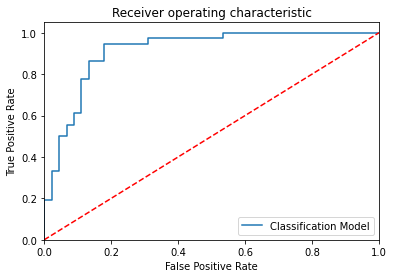

-----------------------------------------------------------------------------------------------------


In [38]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
     #Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    HTResults = HTResults.append(new_row, ignore_index=True)

In [40]:
HTResults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),34,2,8,37,0.877,0.810,0.944,0.872,0.822,0.762,0.883333,0.883
1,DecisionTreeClassifier(),31,5,16,29,0.741,0.660,0.861,0.747,0.644,0.509,0.752778,0.752
2,"(DecisionTreeClassifier(max_features='sqrt', r...",32,4,7,38,0.864,0.821,0.889,0.853,0.844,0.729,0.866667,0.866
3,"(ExtraTreeClassifier(random_state=699642077), ...",32,4,5,40,0.889,0.865,0.889,0.877,0.889,0.776,0.888889,0.889
4,KNeighborsClassifier(),27,9,7,38,0.802,0.794,0.750,0.771,0.844,0.599,0.797222,0.797
5,(DecisionTreeClassifier(random_state=860272458...,33,3,8,37,0.864,0.805,0.917,0.857,0.822,0.734,0.869444,0.869
6,([DecisionTreeRegressor(criterion='friedman_ms...,34,2,9,36,0.864,0.791,0.944,0.861,0.800,0.741,0.872222,0.872
7,LGBMClassifier(),32,4,7,38,0.864,0.821,0.889,0.853,0.844,0.729,0.866667,0.866
8,GaussianNB(),31,5,8,37,0.840,0.795,0.861,0.827,0.822,0.680,0.841667,0.841
